<a href="https://colab.research.google.com/github/MRazin172/PredictiveAnalytics_2348534/blob/main/PA_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [42]:
data=pd.read_excel("/content/Online Retail.xlsx")

In [43]:
data.shape

(541909, 8)

In [44]:
data.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]>

In [45]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#Q1. Data Cleaning and Preparation

checking for null values in the dataset

In [46]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


removing null values

In [47]:
data=data.dropna()

In [48]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [49]:
data.shape

(406829, 8)

In [51]:
data.Quantity.min()

-80995

removing quantitly values that are negative

In [53]:
data = data[data['Quantity'] >= 0]

In [54]:
data.Quantity.min()

1

In [55]:
data.shape

(397924, 8)

remvoving duplicate entries

In [59]:
data = data.drop_duplicates()

In [60]:
data.shape

(392732, 8)

In [67]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

finding the mean and median

In [79]:
data['Quantity'].mean()


13.15371805709746

In [80]:
data['Quantity'].median()

6.0

In [81]:
data['UnitPrice'].mean()


3.1255955307945373

In [82]:
data['UnitPrice'].median()

1.95

#Q2. Sales Analysis

In [83]:
top_10_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_10_products)


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


here we can see that the top 10 most sold products, the PAPER CRAFT , LITTLE BIRDIE is the highest with 80995

visualizing

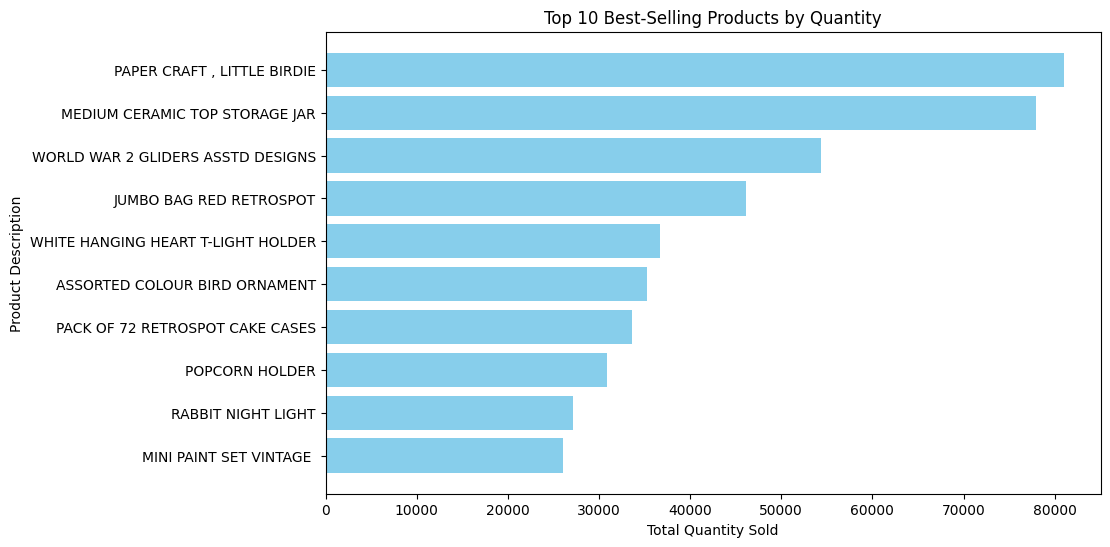

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_10_products['Description'], top_10_products['Quantity'], color='skyblue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.gca().invert_yaxis()
plt.show()


In [87]:
data['Revenue'] = data['Quantity'] * data['UnitPrice']

product_revenue = data.groupby('Description')['Revenue'].sum().reset_index()

product_revenue = product_revenue.sort_values(by='Revenue', ascending=False)

product_revenue.head(10)


,Description,Revenue
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142264.75
3698,WHITE HANGING HEART T-LIGHT HOLDER,100392.10
1762,JUMBO BAG RED RETROSPOT,85040.54
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
2611,POSTAGE,77803.96
2345,PARTY BUNTING,68785.23
216,ASSORTED COLOUR BIRD ORNAMENT,56413.03
2130,Manual,53419.93
2656,RABBIT NIGHT LIGHT,51251.24


here we can see the top 10 products with highest reveneu generation. highest is PAPER CRAFT , LITTLE BIRDIE with the revenue of 168469.60

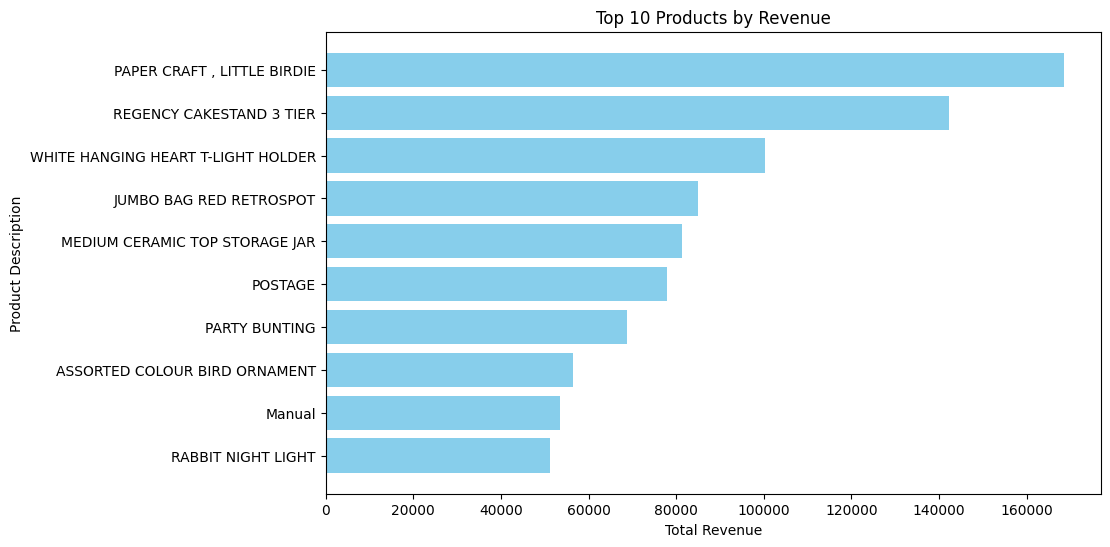

In [112]:
import matplotlib.pyplot as plt

top_10_revenue_products = product_revenue.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10_revenue_products['Description'], top_10_revenue_products['Revenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.title('Top 10 Products by Revenue')
plt.gca().invert_yaxis()
plt.show()


In [95]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['Month'] = data['InvoiceDate'].dt.to_period('M')

data['Revenue'] = data['Quantity'] * data['UnitPrice']

monthly_revenue = data.groupby('Month')['Revenue'].sum().reset_index()


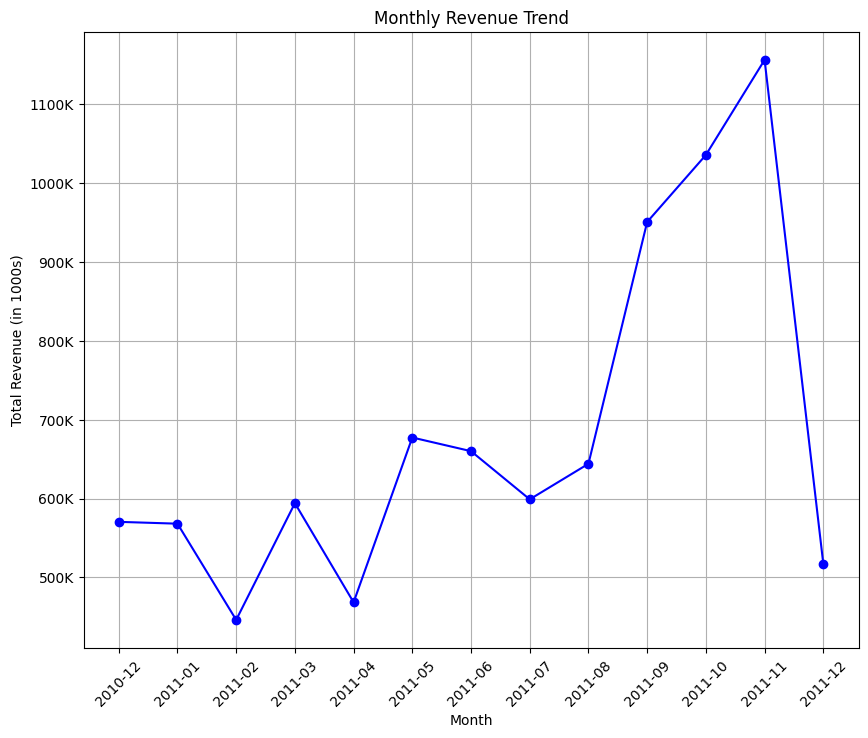

In [96]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    return f'{int(x / 1000)}K'

plt.figure(figsize=(10,8))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Revenue'], marker='o', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Revenue (in 1000s)')
plt.title('Monthly Revenue Trend')
plt.grid(True)

formatter = FuncFormatter(thousands)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


above graph shows us the total revenue generated by months of the year.

here we can see that the lowest was revenue was in february of 2011.

and the highest was in November of 2011 followed by october in the second place

rest of the months were pretty in the mid ranges


In [90]:
max_revenue_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmax()]

min_revenue_month = monthly_revenue.loc[monthly_revenue['Revenue'].idxmin()]

print(f"Month with highest revenue: {max_revenue_month['Month']}, Revenue: {max_revenue_month['Revenue']}")
print(f"Month with lowest revenue: {min_revenue_month['Month']}, Revenue: {min_revenue_month['Revenue']}")


Month with highest revenue: 2011-11, Revenue: 1156205.61
Month with lowest revenue: 2011-02, Revenue: 446084.92


#Q3. Customer Behaviour

In [121]:
unique_countries = data['Country'].nunique()
print(f"Number of unique countries: {unique_countries}")


Number of unique countries: 37


there are 37 countries in which the products are sold

In [98]:
unique_customers = data['CustomerID'].nunique()
print(f"Number of unique customers: {unique_customers}")

data['TotalSales'] = data['Quantity'] * data['UnitPrice']
total_sales = data['TotalSales'].sum()

repeat_customers = data[data.duplicated(subset='CustomerID', keep=False)]
repeat_sales = repeat_customers['TotalSales'].sum()

percentage_repeat_sales = (repeat_sales / total_sales) * 100
print(f"Percentage of sales driven by repeat customers: {percentage_repeat_sales:.2f}%")

Number of unique customers: 4339
Percentage of sales driven by repeat customers: 98.90%


here we can see that there are 4339 unique custmores and the 98.9% of sales were driven by repeat customers

In [100]:
invoice_sales = data.groupby('InvoiceNo')['TotalSales'].sum()

average_order_value = invoice_sales.mean()
print(f"Average order value: {average_order_value:.2f}")

country_avg_order_value = data.groupby('Country')['TotalSales'].sum() / data.groupby('Country')['InvoiceNo'].nunique()
country_avg_order_value = country_avg_order_value.sort_values(ascending=False)
print("\nAverage order value by country:")
print(country_avg_order_value)

Average order value: 479.46

Average order value by country:
Country
Singapore               3039.898571
Netherlands             3004.698316
Australia               2429.014211
Japan                   1969.282632
Lebanon                 1693.880000
Israel                  1443.168000
Brazil                  1143.600000
Switzerland             1106.744118
Sweden                  1065.773056
Denmark                 1053.074444
EIRE                    1020.240231
Norway                  1004.595556
RSA                     1002.310000
Greece                   952.104000
Cyprus                   843.928125
Channel Islands          786.174615
USA                      716.078000
Spain                    683.984000
United Arab Emirates     634.093333
Iceland                  615.714286
Canada                   611.063333
Austria                  599.922353
Portugal                 585.541053
Finland                  549.904390
Malta                    545.118000
France                   537.10

here the Average order value was found to be 479.46

and Singapore had the maximum with 3039.898571

the least was Saudi Arabia


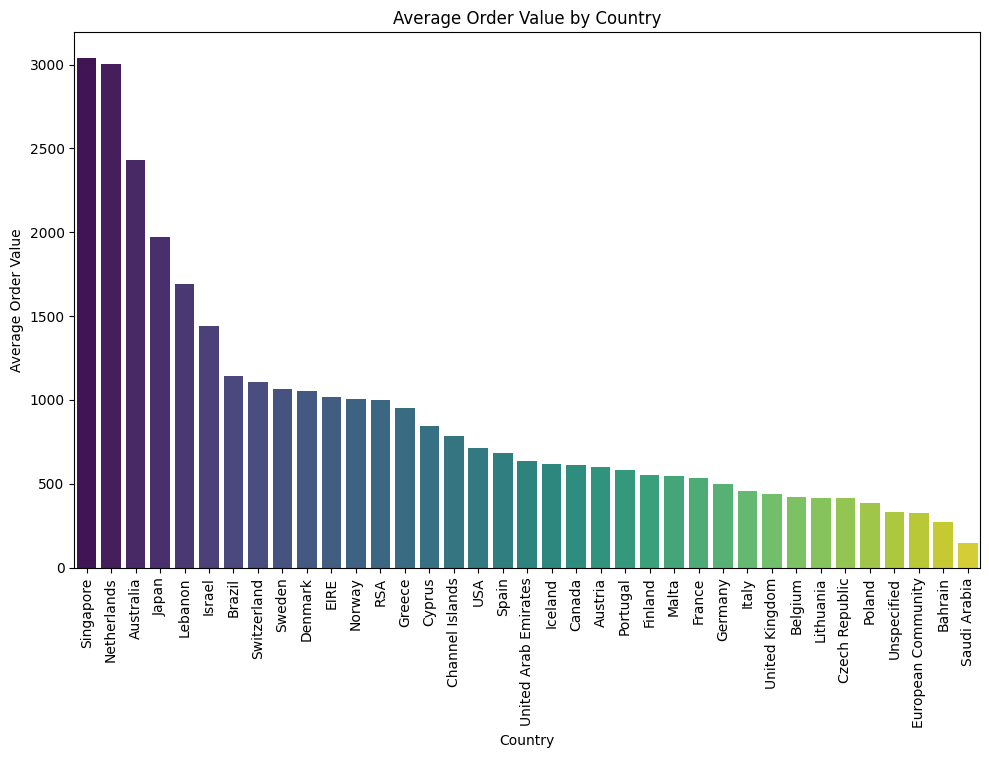

In [103]:
plt.figure(figsize=(10,8))
sns.barplot(x=country_avg_order_value.index, y=country_avg_order_value.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Country')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [106]:
country_sales = data.groupby('Country')['TotalSales'].sum()

country_sales = country_sales.sort_values(ascending=False)

print("Countries contributing the most to sales revenue:")
print(country_sales)


Countries contributing the most to sales revenue:
Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta 

here we can see the Countries contributing the most to sales revenue. UK was the highest contributor anf the least was in Saudi Arabia

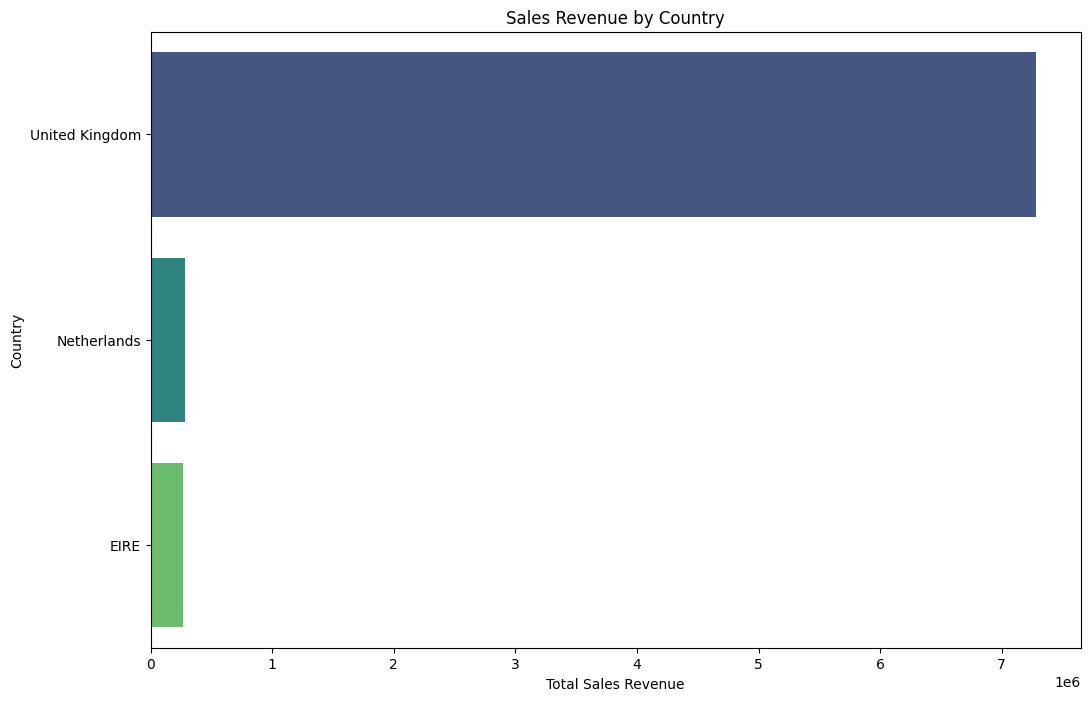

In [108]:
data['TotalSales'] = data['Quantity'] * data['UnitPrice']
country_sales = data.groupby('Country')['TotalSales'].sum()

country_sales = country_sales.sort_values(ascending=False).head(3)

plt.figure(figsize=(12, 8))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='viridis')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Country')
plt.title('Sales Revenue by Country')
plt.show()

#Q4. Product Performance

In [110]:

data['TotalSales'] = data['Quantity'] * data['UnitPrice']

country_sales = data.groupby('Country')['TotalSales'].sum()
country_transactions = data.groupby('Country')['InvoiceNo'].nunique()

average_revenue_per_transaction = country_sales / country_transactions

top_5_countries = average_revenue_per_transaction.sort_values(ascending=False).head(5)

print("Top 5 countries with the highest average revenue per transaction:")
print(top_5_countries)


Top 5 countries with the highest average revenue per transaction:
Country
Singapore      3039.898571
Netherlands    3004.698316
Australia      2429.014211
Japan          1969.282632
Lebanon        1693.880000
dtype: float64


there are top 5 countries with the highest average revenue per transaction.

Singapore was the highest followed by nethrelands and australia

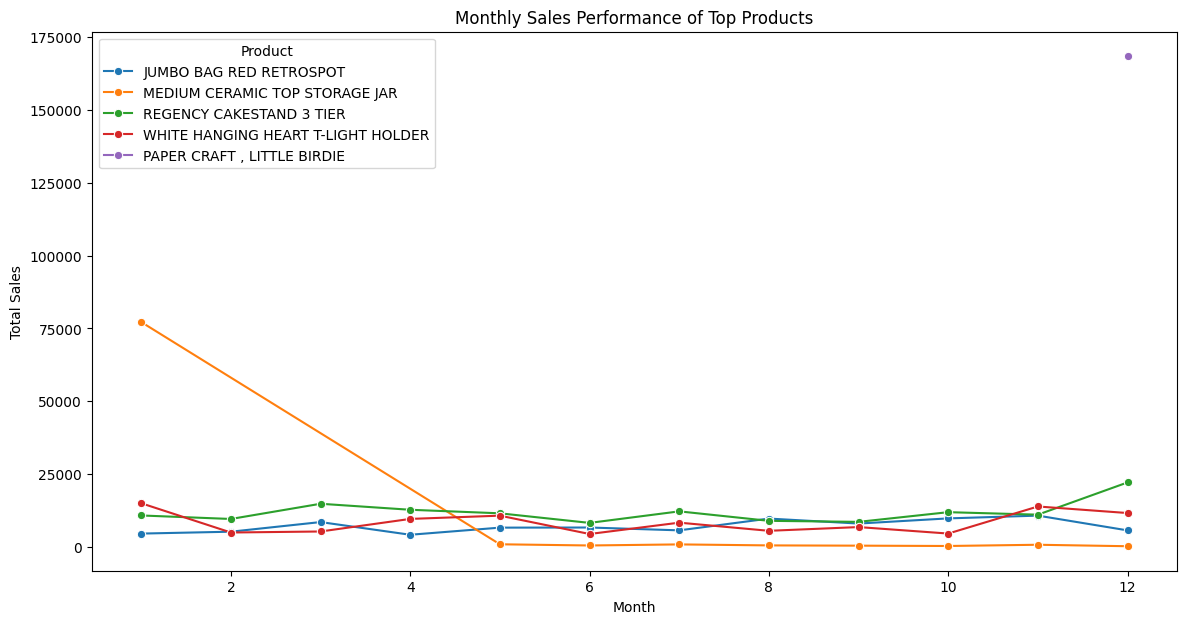

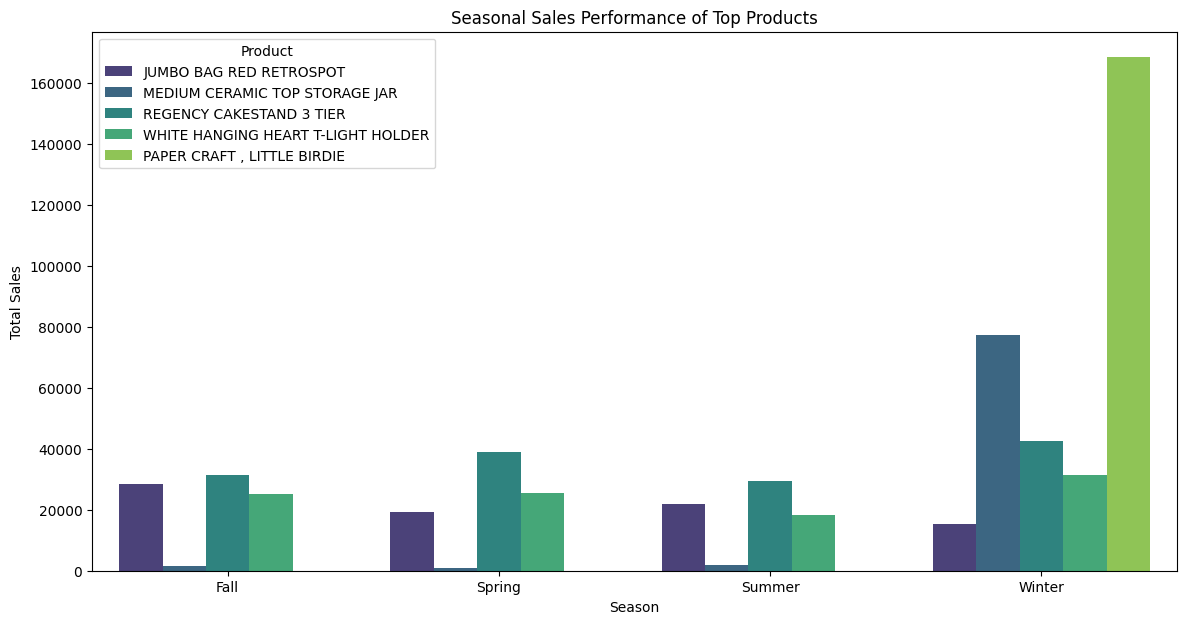

In [111]:

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['Month'] = data['InvoiceDate'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

data['Season'] = data['Month'].apply(get_season)

monthly_product_sales = data.groupby(['Month', 'Description'])['TotalSales'].sum().reset_index()

seasonal_product_sales = data.groupby(['Season', 'Description'])['TotalSales'].sum().reset_index()

top_products = monthly_product_sales.groupby('Description')['TotalSales'].sum().nlargest(5).index
top_monthly_sales = monthly_product_sales[monthly_product_sales['Description'].isin(top_products)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=top_monthly_sales, x='Month', y='TotalSales', hue='Description', marker='o')
plt.title('Monthly Sales Performance of Top Products')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.show()

top_seasonal_sales = seasonal_product_sales[seasonal_product_sales['Description'].isin(top_products)]

plt.figure(figsize=(14, 7))
sns.barplot(data=top_seasonal_sales, x='Season', y='TotalSales', hue='Description', palette='viridis')
plt.title('Seasonal Sales Performance of Top Products')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.show()


in this visualization we can see some intresting facts about the products.

#Monthly

in the month of January the sales of MEDIUM CERAMIC TOP STORAGE JAR was very high in the range of 75000. but in came down in the rest of the months

all the other products were in the lower range for the complete year around

#Season

in the winter season the sales of MEDIUM CERAMIC TOP STORAGE JAR and PAPER CRAFT , LITTLE BIRDIE was high.
generally the sales in the winter season is high for all the products.

but in the rest of the seasons such as in fall, summer and spring the sales are pretty much the same.